# NETFLIX STOCK ANALYSIS

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
from datetime import datetime

In [2]:
# 1>  Identifying the Problem.
# 2> Designing data requirement.
# 3> Preprocessing Data.
# 4> Performing analytics over data.
# 5> Visualizing data.

# >>>Objective
#1> Volume of Stock Traded
#2> Netflix Price- High, Open, Close
#3> Netflix Stock Price- Day, Month, Year Wise
#4> Top-5 Dates with Highest Stock Price
#5> Top-5 Dates with Lowest Stock Price

In [10]:
df=pd.read_csv("NFLXdaily.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


# 1> Volume of Stock Traded

In [11]:
sns.set(rc={'figure.figsize':(10,5)})

In [12]:
df['date']=pd.to_datetime(df['Date'])

In [13]:
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,2019-01-02
2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,2019-01-03
2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,2019-01-04
2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,2019-01-07
2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,2019-01-08


Text(0.5, 1.0, 'Volume of stock vs time')

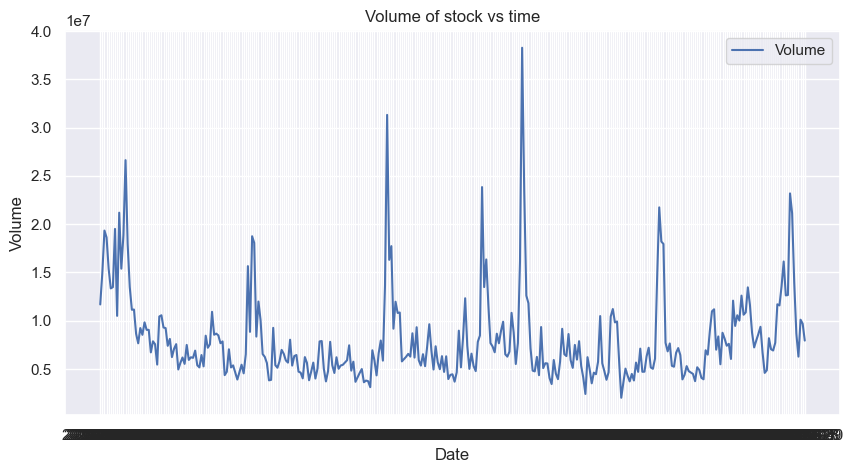

In [14]:
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
plt.title("Volume of stock vs time")

# 2> Netflix Price- High, Open, Close

<Axes: title={'center': 'Nettflix stock price'}, xlabel='Date'>

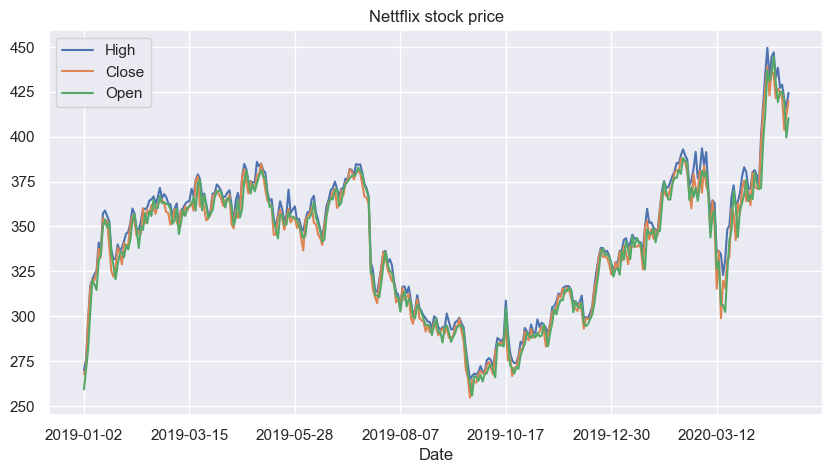

In [16]:
df.plot(y=['High','Close','Open'],title="Nettflix stock price")

# 3> Netflix Stock Price- Day, Month, Year Wise

<Axes: xlabel='Year'>

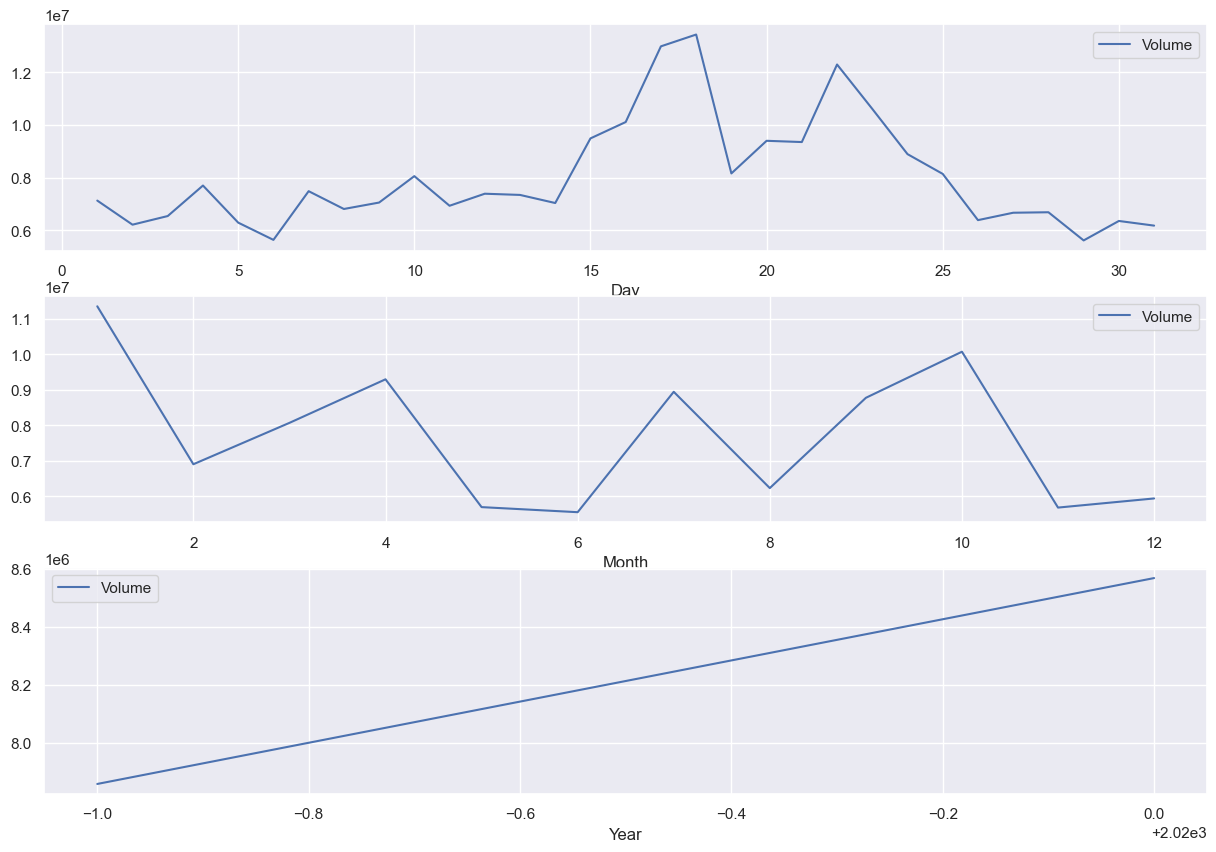

In [29]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
df.index = pd.to_datetime(df.index)
df.groupby(df.index.day).mean().plot(y = 'Volume',ax=ax1, xlabel = 'Day')
df.groupby(df.index.month).mean().plot(y = 'Volume',ax=ax2, xlabel = 'Month')
df.groupby(df.index.year).mean().plot(y = 'Volume',ax=ax3, xlabel = 'Year')

# 4> Top-5 Dates with Highest Stock Price

In [30]:
df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,2019-01-02
2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,2019-01-03
2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,2019-01-04
2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,2019-01-07
2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,2019-01-08
...,...,...,...,...,...,...,...
2020-04-24,425.000000,427.170013,415.880005,424.989990,424.989990,8670400,2020-04-24
2020-04-27,425.000000,429.000000,420.839996,421.380005,421.380005,6277500,2020-04-27
2020-04-28,419.989990,421.000000,402.910004,403.829987,403.829987,10101200,2020-04-28


In [35]:
a=df.sort_values(by="High",ascending= False).head(5)
a['High']

Date
2020-04-16    449.519989
2020-04-21    447.000000
2020-04-20    444.489990
2020-04-23    438.410004
2020-04-15    434.980011
Name: High, dtype: float64

# 5> Top-5 Dates with Lowest Stock Price

In [36]:
b=df.sort_values(by="Low",ascending= True).head(5)
a['Low']

Date
2020-04-16    431.609985
2020-04-21    425.600006
2020-04-20    430.559998
2020-04-23    419.260010
2020-04-15    412.250000
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

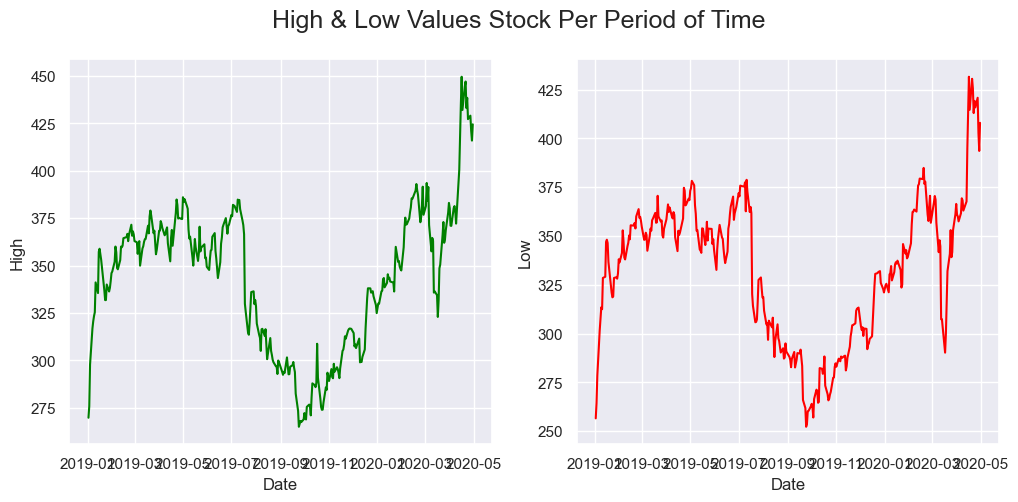

In [43]:
fig, axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle('High & Low Values Stock Per Period of Time',fontsize=18)
sns.lineplot(ax=axes[0],y=df['High'],x=df.index,color='green')
sns.lineplot(ax=axes[1],y=df['Low'],x=df.index,color='red')

In [ ]:
# 